In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df = pd.read_csv("out.csv")

CLEANING/ EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0


In [19]:
df.isnull().sum()

url                        0
source                     0
label                      0
url_length                 0
starts_with_ip             0
url_entropy                0
has_punycode               0
digit_letter_ratio         0
dot_count                  0
at_count                   0
dash_count                 0
tld_count                  0
domain_has_digits          0
subdomain_count            0
nan_char_entropy           0
has_internal_links         0
whois_data            545299
domain_age_days       750688
dtype: int64

In [20]:
df= df.drop('whois_data', axis = 1)

In [18]:
df = df.dropna(subset=['url'])

In [21]:
df = df.fillna(value=-1)

In [22]:
df = df.drop('url', axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB


In [6]:
legit_maxlength = df['url_length'][df['label']=='legitimate'].max()
legit_minlength = df['url_length'][df['label']=='legitimate'].min()
phish_maxlength = df['url_length'][df['label']=='phishing'].max()
phish_minlength = df['url_length'][df['label']=='phishing'].min()

print(legit_maxlength, legit_minlength, phish_maxlength,phish_minlength)

253 4 25523 9


In [7]:
df.nunique()

url                   2499999
source                      5
label                       2
url_length               1360
starts_with_ip              2
url_entropy            428952
has_punycode                2
digit_letter_ratio      18823
dot_count                 102
at_count                   18
dash_count                 99
tld_count                  54
domain_has_digits           2
subdomain_count            44
nan_char_entropy        72633
has_internal_links          2
whois_data             839151
domain_age_days         12120
dtype: int64

In [9]:
def cat_plot(data, var, hue):
    # total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(y=data[var], edgecolor='black', hue=hues[i], linewidth=1, ax=ax[i], data=data)
        ax[i].set_ylabel('')    
        ax[i].set_xlabel('')
        ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=18, weight='bold')
        ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13)
        ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)

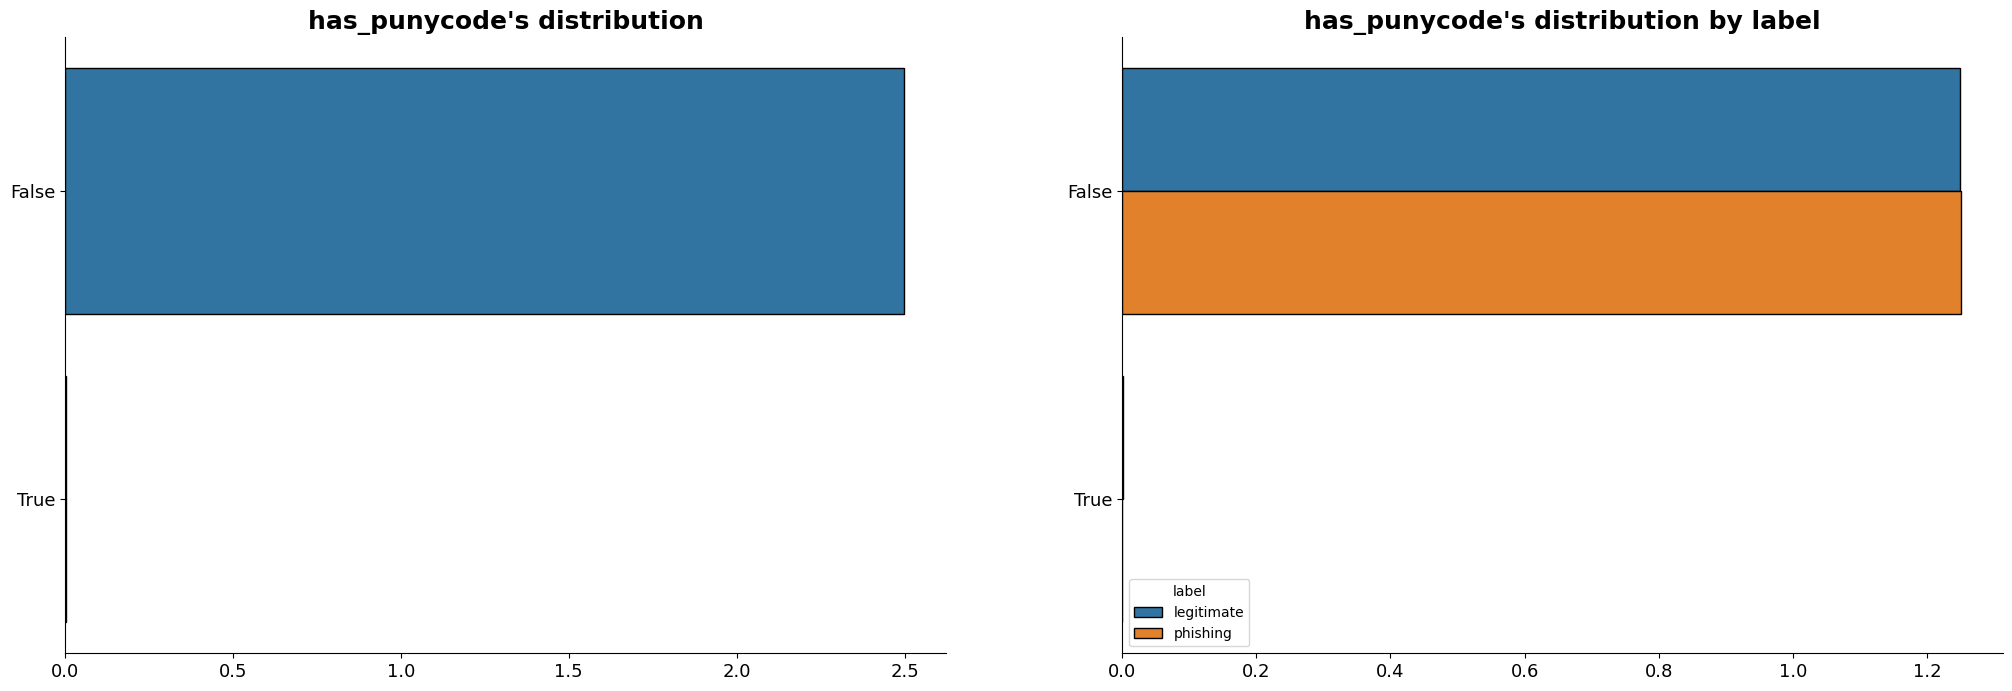

In [10]:
cat_plot(df, 'has_punycode', 'label')

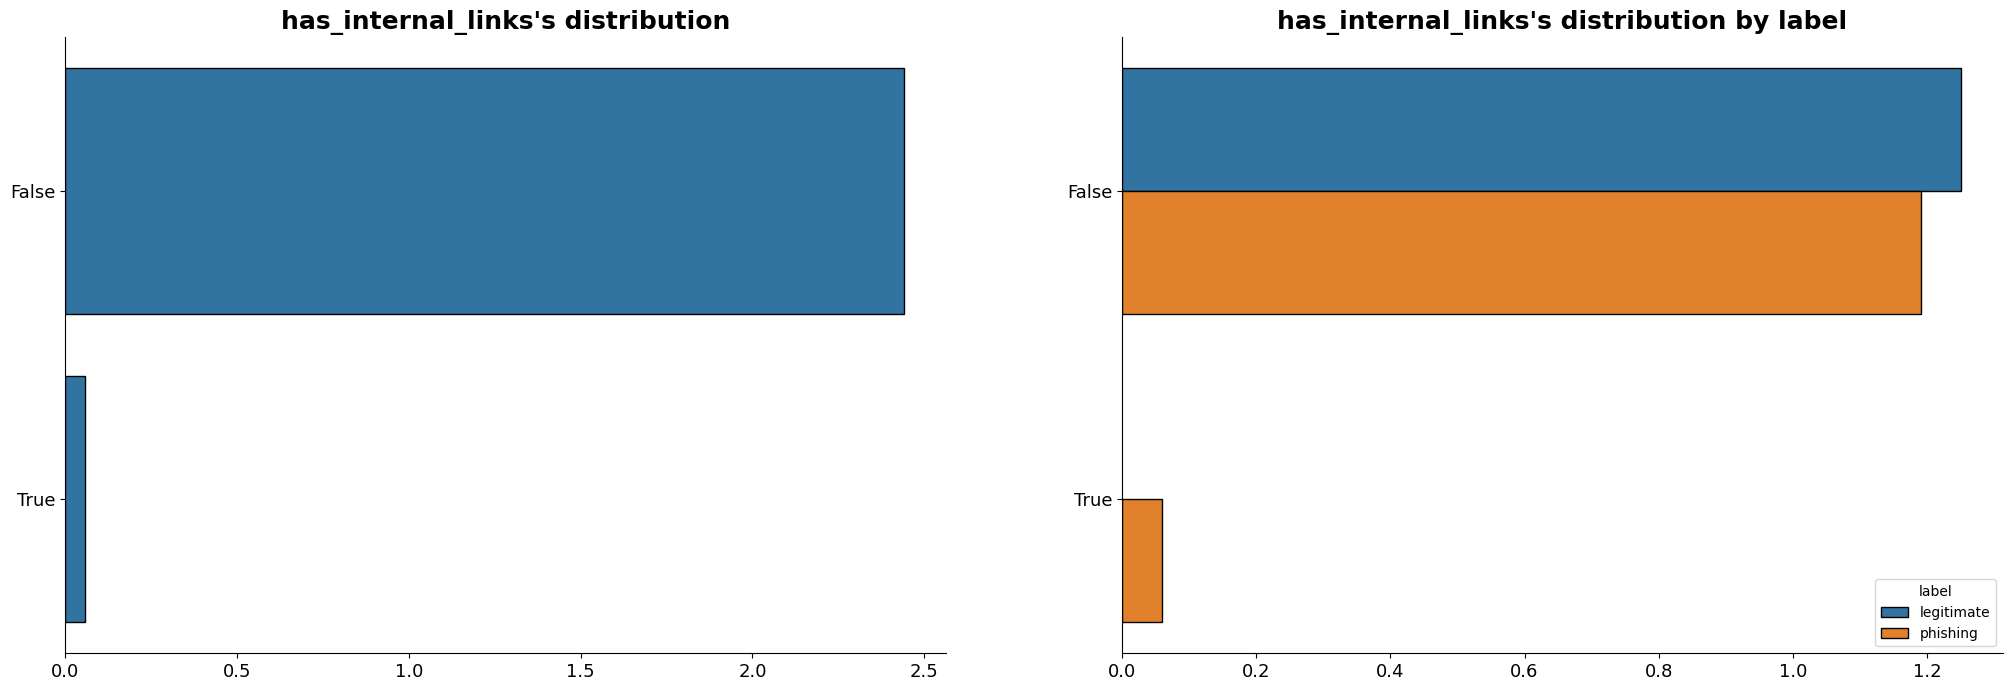

In [12]:
cat_plot(df,'has_internal_links', 'label')

In [15]:
# finding the maximum domain age for legitimate and phishing sites
max_phishdomain = df[df['label']== 'phishing']['domain_age_days'].max()
print(f"the maximum phishing domain age is :{max_phishdomain}")

the maximum phishing domain age is :14353.0


In [17]:
phish_mindomain = df[df['label']=='phishing']['domain_age_days'].min()
legit_maxdomain = df[df['label']== 'legitimate']['domain_age_days'].max()
legit_mindomain = df[df['label']=='legitimate']['domain_age_days'].min()

print(f"the minimum phishing domain age is: {phish_mindomain}\n the maximum legit domain age is: {legit_maxdomain}\n the minimum legit domain is: {legit_mindomain}")

the minimum phishing domain age is: -86.0
 the maximum legit domain age is: 45541.0
 the minimum legit domain is: -85.0


BUILDING AND EVALUATING MODEL

In [23]:
# Converting categorical columns into numerical columns
for column in df.select_dtypes(include = ['object']):
    df[column], _ = pd.factorize(df[column])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499999 entries, 0 to 2499999
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   source              int64  
 1   label               int64  
 2   url_length          int64  
 3   starts_with_ip      bool   
 4   url_entropy         float64
 5   has_punycode        bool   
 6   digit_letter_ratio  float64
 7   dot_count           int64  
 8   at_count            int64  
 9   dash_count          int64  
 10  tld_count           int64  
 11  domain_has_digits   bool   
 12  subdomain_count     int64  
 13  nan_char_entropy    float64
 14  has_internal_links  bool   
 15  domain_age_days     float64
dtypes: bool(4), float64(4), int64(8)
memory usage: 257.5 MB


In [25]:
x = df.drop(['label'], axis = 1)
y = df['label']

In [26]:
# Importing modules for model 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix
import joblib

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = BaggingClassifier()

In [28]:
model.fit(x_train, y_train)

BaggingClassifier()

In [29]:
model.score(x_train, y_train)

1.0

In [30]:
model.score(x_test, y_test)

1.0

In [31]:
predict = model.predict(x_test)

In [32]:
r2 = r2_score(y_test, predict)
r2

1.0

In [33]:
mae = mean_absolute_error(y_test, predict)
mae

0.0

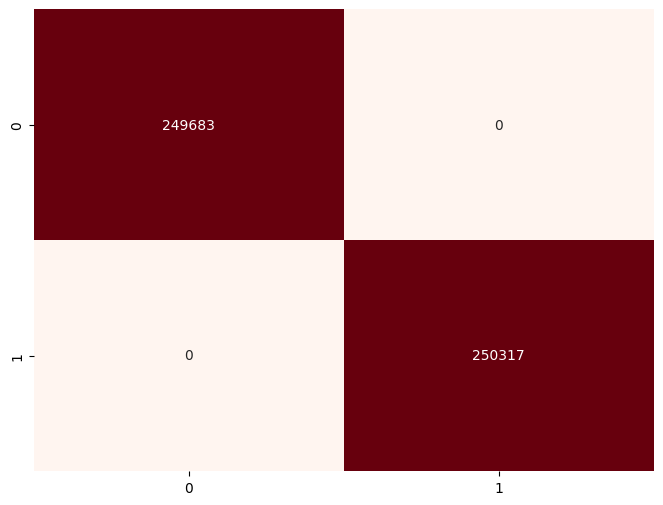

In [35]:
cm = confusion_matrix(y_test,predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Reds",cbar = False)
plt.xlabel = 'Predicted Label'
plt.ylabel = "True"
plt.title = "Confusion Matrix"
plt.show()